In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

######################################## EDA MAIN DATA, MOVIES.CSV  ####################################################  

######################## PREPARANDO DATOS #########################

In [117]:
# Loading ETL_movies_main

In [118]:
movies_df = pd.read_csv("ETL_movies_main.csv")

In [119]:
movies_df = movies_df.drop(['belongs_to_collection','genres','production_companies','production_countries','spoken_languages'],axis=1)

In [120]:
movies_df.shape

(45346, 15)

In [121]:
# Loading ETL_movies_collection

In [122]:
movies_df_collection = pd.read_csv("ETL_movies_collection.csv")

In [123]:
movies_df_collection.shape

(4485, 4)

In [124]:
# Loading ETL_movies_genres

In [125]:
movies_df_genres = pd.read_csv("ETL_movies_genres.csv")

In [126]:
movies_df_genres = movies_df_genres.drop_duplicates(["Movie_id"],keep="first")

In [127]:
movies_df_genres.shape

(42962, 3)

In [128]:
# Loading ETL_movies_languages

In [129]:
movies_df_languages = pd.read_csv("ETL_movies_languages.csv")

In [130]:
movies_df_languages.shape

(45346, 3)

In [131]:
# ETL_movies_productions

In [132]:
movies_df_production = pd.read_csv("ETL_movies_productions.csv")

In [133]:
movies_df_production = movies_df_production.drop_duplicates(["Movie_id"],keep="first")

In [134]:
movies_df_production.shape

(45346, 5)

In [135]:
# Loading ETL_credits_cast

In [136]:
df_cast = pd.read_csv("ETL_credits_cast.csv")

In [137]:
df_cast.shape

(564546, 9)

In [138]:
# Loading ETL_credits_crew

In [139]:
df_crew = pd.read_csv("ETL_credits_crew.csv")

In [140]:
df_crew.shape

(464698, 8)

In [141]:
######################  Joining and obtaining a final dataframe to explore  ######################################

In [58]:
df_final = movies_df.merge(movies_df_collection,how="left",left_on="Movie_id",right_on="Movie_id")
df_final = df_final.merge(movies_df_genres,how="left",left_on="Movie_id",right_on="Movie_id")
df_final = df_final.merge(movies_df_languages,how="left",left_on="Movie_id",right_on="Movie_id")
df_final = df_final.merge(movies_df_production,how="left",left_on="Movie_id",right_on="Movie_id")

##################################### DISTRIBUCION DE VALORES ######################################################

In [63]:
# Budgets and revenues are often 0 
df_final.describe(include="all")

,budget,Movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,poster_path,backdrop_path,id,genero,short_language,language,company_name,company_id,country_code,country_name
count,4.534600e+04,45346.000000,45335,44405,4.534600e+04,45346,4.534600e+04,45100.000000,45266,20387,...,3942,3258,42962.000000,42962,42862,42475,41088,41088.000000,39137,39138
unique,NaN,NaN,89,44232,NaN,17333,NaN,NaN,6,20269,...,1403,1122,NaN,20,126,73,14025,NaN,142,143
top,NaN,NaN,en,No overview found.,NaN,2008-01-01,NaN,NaN,Released,Based on a true story.,...,/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg,/foe3kuiJmg5AklhtD3skWbaTMf2.jpg,NaN,Drama,en,English,Warner Bros.,NaN,US,United States of America
freq,NaN,NaN,32184,133,NaN,136,NaN,NaN,44907,7,...,29,29,NaN,11948,23981,23981,934,NaN,18410,18410
mean,4.232580e+06,108042.219645,NaN,NaN,4.232580e+06,NaN,1.123366e+07,94.177805,NaN,NaN,...,NaN,NaN,937.608515,NaN,NaN,NaN,NaN,12572.280958,NaN,NaN
std,1.744373e+07,112187.326746,NaN,NaN,1.744373e+07,NaN,6.440990e+07,38.348775,NaN,NaN,...,NaN,NaN,2925.454213,NaN,NaN,NaN,NaN,19024.678897,NaN,NaN
min,0.000000e+00,2.000000,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000,NaN,NaN,...,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,0.000000e+00,26390.250000,NaN,NaN,0.000000e+00,NaN,0.000000e+00,85.000000,NaN,NaN,...,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,925.000000,NaN,NaN
50%,0.000000e+00,59852.500000,NaN,NaN,0.000000e+00,NaN,0.000000e+00,95.000000,NaN,NaN,...,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,6117.000000,NaN,NaN
75%,0.000000e+00,156601.500000,NaN,NaN,0.000000e+00,NaN,0.000000e+00,107.000000,NaN,NaN,...,NaN,NaN,53.000000,NaN,NaN,NaN,NaN,13255.000000,NaN,NaN


In [71]:
# Budget and revenue Evaluation
df_final["budget"].loc[0:100].describe()

count    1.010000e+02
mean     1.479623e+07
std      2.101631e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.000000e+06
75%      2.000000e+07
max      9.800000e+07
Name: budget, dtype: float64

In [65]:
df_final[["budget","revenue"]].describe()

,budget,revenue
count,4.534600e+04,4.534600e+04
mean,4.232580e+06,1.123366e+07
std,1.744373e+07,6.440990e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


In [69]:
df_final["budget"].value_counts()

budget
0.0            36470
5000000.0        286
10000000.0       258
20000000.0       243
2000000.0        242
               ...  
82500000.0         1
270000000.0        1
923.0              1
72500000.0         1
1254040.0          1
Name: count, Length: 1223, dtype: int64

In [72]:
df_final["revenue"].value_counts()

revenue
0.0           37949
12000000.0       20
11000000.0       19
10000000.0       19
2000000.0        18
              ...  
35610100.0        1
10217873.0        1
100000.0          1
15073942.0        1
1413000.0         1
Name: count, Length: 6863, dtype: int64

"""Concluyendo, hay una gran cantidad de peliculas sin un presupuesto y sin una ganancia bruta en el Dataset """

In [70]:
# Evaluating skewness

In [253]:
skewness = df_final['budget'].skew()
skewness

#DataFrame skewed to the left

7.117292389534931

In [74]:
skewness = df_final['revenue'].skew()
skewness

#DataFrame skewed to the left

12.25126423396862

In [254]:
skewness2 = df_final['revenue'].skew()
skewness2

12.25297791650034

"""Dado que la mayoría de los valores se agrupan alrededor de 0 y hay algunos valores muy altos que son significativamente más grandes que el resto
 de los datos, esta distribución está sesgada hacia la derecha (sesgo positivo)."""

In [77]:
#################### Peliculas con mas Ingresos ###############################

C:\Users\Ing. Nicolas Yapur\AppData\Local\Temp\ipykernel_24200\3893593397.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_by_revenue['title'], rotation=45, ha='right')


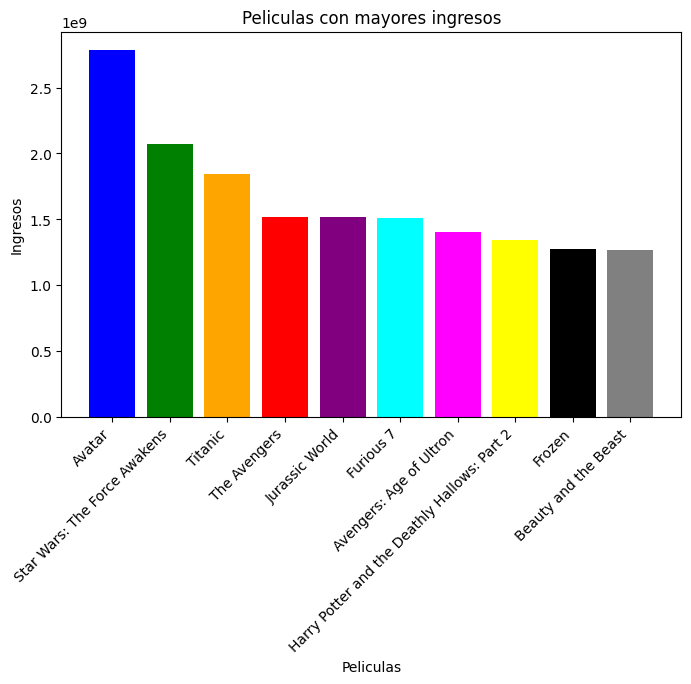

In [75]:
#  Analizando presupuesto(budget) y ganancias(revenue)

movies_df_sorted_by_revenue = df_final.sort_values(by='revenue', ascending=False)

top_by_revenue = movies_df_sorted_by_revenue.head(10)    

colores = ['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray']

# Gráfico de barras para ingresos
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(top_by_revenue['title'], top_by_revenue['revenue'], color=colores)
ax.set_xlabel('Peliculas')
ax.set_ylabel('Ingresos')
ax.set_title('Peliculas con mayores ingresos')
ax.set_xticklabels(top_by_revenue['title'], rotation=45, ha='right')

plt.show()

In [78]:
#################### Peliculas con mas Presupuesto ###############################

C:\Users\Ing. Nicolas Yapur\AppData\Local\Temp\ipykernel_24200\1957257678.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_by_budget['title'], rotation=45, ha='right')


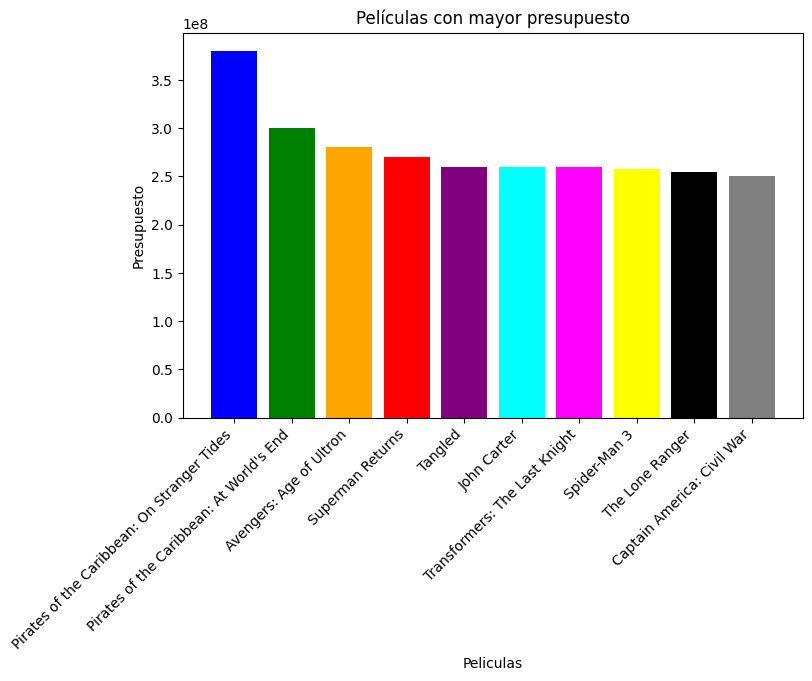

In [80]:
#  Analizando presupuesto(budget) y ganancias(revenue)

movies_df_sorted_by_budget = df_final.sort_values(by='budget', ascending=False)
 
top_by_budget = movies_df_sorted_by_budget.head(10)   

colores = ['blue', 'green', 'orange', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'gray']

# Gráfico de barras para ingresos
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(top_by_budget['title'], top_by_budget['budget'], color=colores)
ax.set_xlabel('Peliculas')
ax.set_ylabel('Presupuesto')
ax.set_title('Películas con mayor presupuesto')
ax.set_xticklabels(top_by_budget['title'], rotation=45, ha='right')

plt.show()

In [104]:
########################## Incremento de la popularidad de las peliculas por año #######################################

In [105]:
df_popularity = df_final[["release_year","popularity"]]

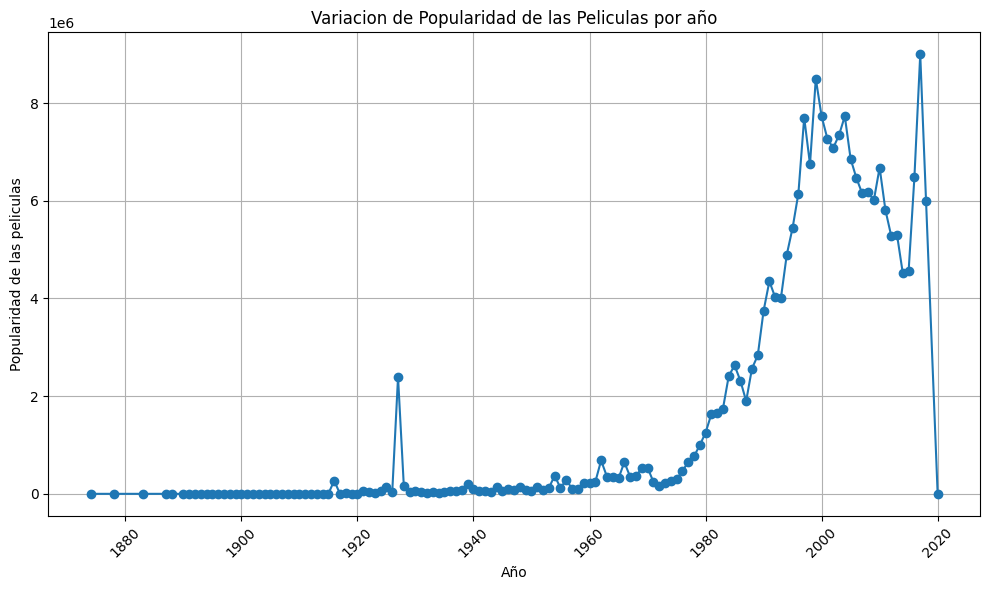

In [144]:
# Group by release year and calculate average popularity
average_popularity_by_year = df_popularity.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_popularity_by_year.index, average_popularity_by_year.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Popularidad de las peliculas')
plt.title('Variacion de Popularidad de las Peliculas por año')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [108]:
###################### Compañias con mayor cantidad de peliculas producidas  #########################

In [112]:
df_companias = df_final[["company_name","budget","Movie_id","return"]]
df_companias = df_companias.dropna(subset=["company_name"],axis=0)
df_companias

,company_name,budget,Movie_id,return
0,Pixar Animation Studios,30000000.0,862,12.451801
1,TriStar Pictures,65000000.0,8844,4.043035
2,Teitler Film,0.0,15602,0.000000
3,Interscope Communications,16000000.0,31357,5.090760
4,Warner Bros.,0.0,11862,0.000000
...,...,...,...,...
45341,Trimark Pictures,0.0,30840,0.000000
45342,Haut et Court,0.0,111109,0.000000
45343,Mille et Une Productions,0.0,67758,0.000000
45344,Propaganda Pictures,0.0,227506,0.000000


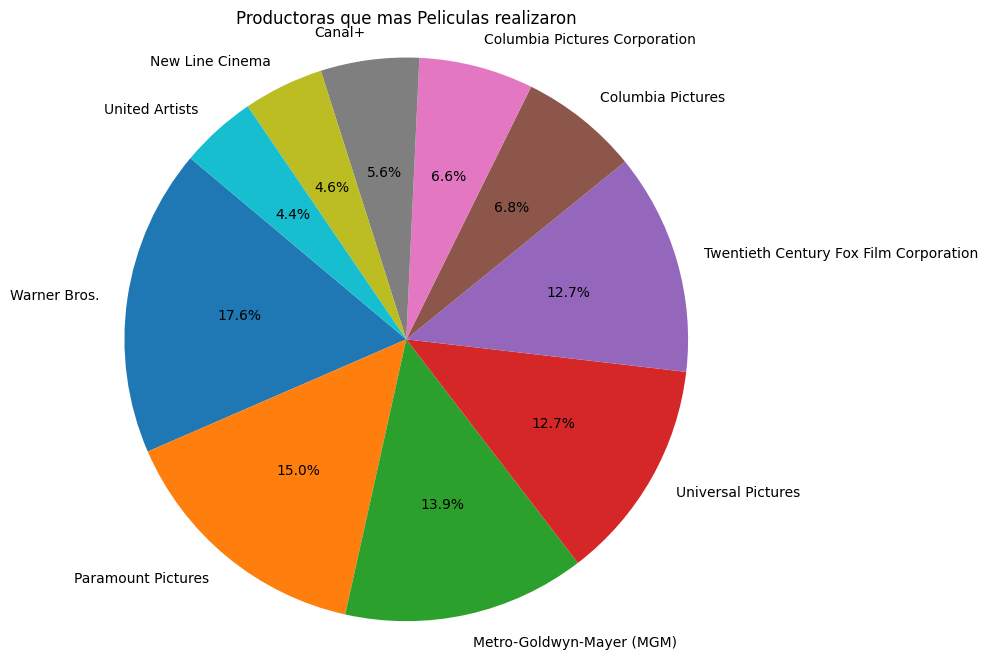

In [145]:
# Group by company name and count the number of Movie IDs
movie_counts_by_company = df_companias['company_name'].value_counts()

# Top 10
top_ten_companies = movie_counts_by_company.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_ten_companies, labels=top_ten_companies.index, autopct='%1.1f%%', startangle=140)
plt.title('Productoras que mas Peliculas realizaron')
plt.axis('equal')  
plt.show()

In [149]:
###################### Compañias con mas Rentables  #########################

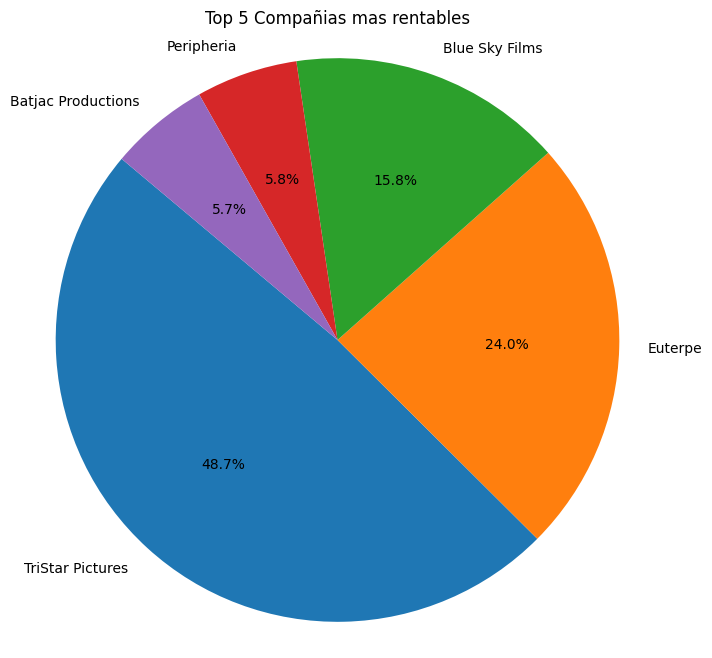

In [148]:
# Group by company name and sum the "return" values
return_sum_by_company = df_companias.groupby('company_name')['return'].sum()

# Top 5
top_ten_companies = return_sum_by_company.nlargest(5)

# Create a pie chart for the sum of "return" values for the top ten companies
plt.figure(figsize=(8, 8))
plt.pie(top_ten_companies, labels=top_ten_companies.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Compañias mas rentables')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###################### CORRELACION #########################

In [81]:
df_correlation = df_final.loc[:,["revenue","popularity","return","budget"]]
#,"company_name","genre"
df_correlation

,revenue,popularity,return,budget
0,373554033.0,30000000.0,12.451801,30000000.0
1,262797249.0,65000000.0,4.043035,65000000.0
2,0.0,0.0,0.000000,0.0
3,81452156.0,16000000.0,5.090760,16000000.0
4,76578911.0,0.0,0.000000,0.0
...,...,...,...,...
45341,0.0,0.0,0.000000,0.0
45342,0.0,0.0,0.000000,0.0
45343,0.0,0.0,0.000000,0.0
45344,0.0,0.0,0.000000,0.0


In [82]:
df_correlation.dtypes

revenue       float64
popularity    float64
return        float64
budget        float64
dtype: object

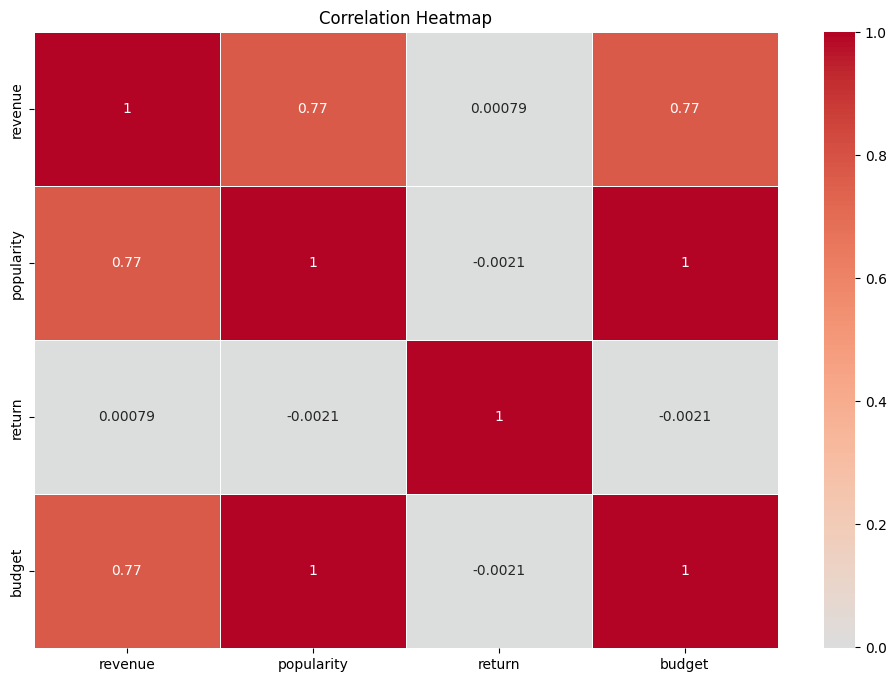

In [83]:

# Calculate the correlation matrix
correlation_matrix = df_correlation.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


""" De esto podemos concluir que El coeficiente de correlación de 0,77 indica una fuerte relación lineal positiva entre las dos variables.
 Esto significa que a medida que aumenta una variable, la otra variable tiende a aumentar también, y viceversa.
   La magnitud de 0,77 sugiere que la relación es bastante fuerte, lo que podría implicar que es probable que los cambios en una variable
     vayan acompañados de cambios proporcionales en la otra variable. Igualmente hay que tomar en cuenta que correlacion no implica causalidad"""

###################### ACTORES CON MAS PELICULAS ########################

In [151]:
df_actores = df_cast.loc[:,["Movie_id","name"]]

In [152]:
df_actores["name"].nunique()

202747

In [153]:
df_actores

,Movie_id,name
0,862,Tom Hanks
1,862,Tim Allen
2,862,Don Rickles
3,862,Jim Varney
4,862,Wallace Shawn
...,...,...
564541,227506,Nathalie Lissenko
564542,227506,Pavel Pavlov
564543,227506,Aleksandr Chabrov
564544,227506,Vera Orlova


In [154]:
df_actor = df_actores.groupby("name",as_index=False)["Movie_id"].count().sort_values('Movie_id',ascending=False).iloc[1:6]

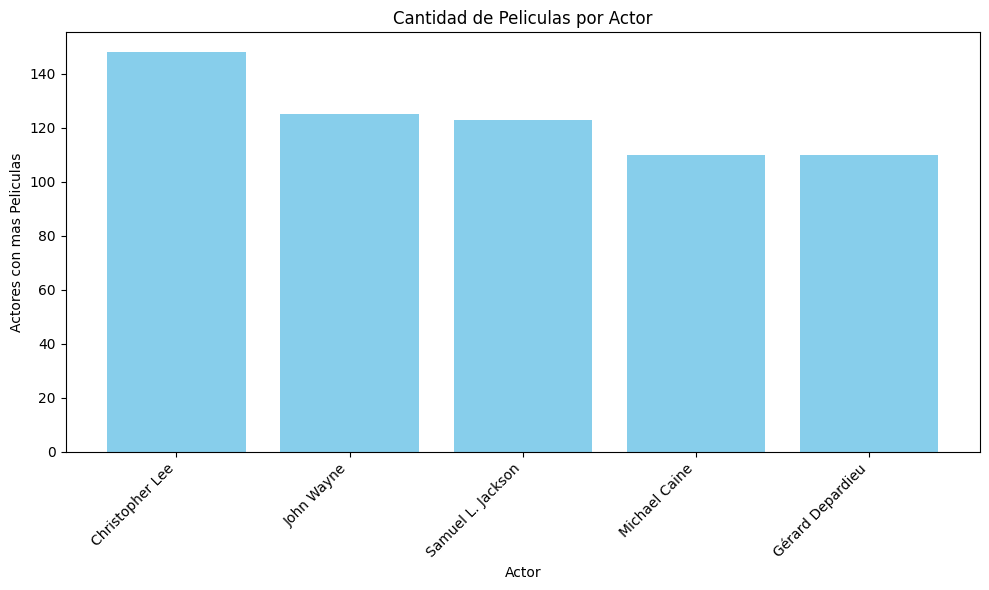

In [155]:
# bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_actor['name'], df_actor['Movie_id'], color='skyblue')
plt.xlabel('Actor')
plt.ylabel('Actores con mas Peliculas')
plt.title('Cantidad de Peliculas por Actor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()